# Relatórios: Laboratório de Física Moderna

- Gabriel Wendell Celestino Rocha

In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy import stats
import pandas as pd
import scipy as sp
import numpy as np

%matplotlib notebook

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)

## Atividade 1

$$\frac{d_{1}}{R}=\frac{C}{\left(P\cdot R\right)^{n}}\implies P\cdot R=\left(\frac{R\cdot C}{d_{1}}\right)^{1/n}\quad\therefore\quad\boxed{P=R^{\frac{n+1}{n}}\cdot\left(\frac{C}{d_{1}}\right)^{1/n}}$$

$$F\cdot d=\Delta K\implies Eq\cdot d=\frac{1}{2}m_ev_e^{2}\quad\therefore\quad\boxed{v_e=\sqrt{\frac{2q\Delta V}{m_e}}}$$

In [24]:
def Pressure(d):
    R = 1.4 # [cm]
    n = 0.32
    C = 1.2 # [(Torr / cm)^(n)]
    Patm = 760 # [Torr]
    P = R**(n+1/n) * (C/d)**(1/n) # [Torr]
     
    return P

print('a) P = ', Pressure(1.0), 'Torr')
print('\nb) Patm/P = ', 760/Pressure(1.0))


def vel_electron(Delta_V):
    m = 9*1e-31 # [kg]
    q = 1.6*1e-19 # [C]
    
    return np.sqrt(2*q*Delta_V/m)

print('\nc) v_e = ', vel_electron(2500), 'm/s')

a) P =  5.63446229253604 Torr

b) Patm/P =  134.88421086902477

c) v_e =  29814239.699997194 m/s


---

## Atividade 3

### Parte 2

$$F_{el.}=2p_i\cdot\frac{I}{e}\quad\therefore\quad\boxed{F_{el.}=2m_e v\cdot\frac{I}{e}}$$

In [284]:
m_e = 9.1*1e-31 # [kg]
v_e = 5*1e7 # [m/s]
I = 2*1e-5 # [A]
e = 1.6*1e-11 # [C]

F_el = 2*m_e*c*I*e**-1
print('Fel =', F_el, 'N')

Fel = -7.63722592716339e-23 N


---

### Parte 3

In [159]:
Exp3_DDP = pd.read_csv('Exp3 - DDP.csv')
Exp3_5 = pd.read_csv('Exp3 - theta_5.csv')
Exp3_7 = pd.read_csv('Exp3 - theta_7.csv')
Exp3_9 = pd.read_csv('Exp3 - theta_9.csv')
Exp3_11 = pd.read_csv('Exp3 - theta_11.csv')

def func(x, A, B, C):
    return A*x**2 + B*x + C

<IPython.core.display.Javascript object>


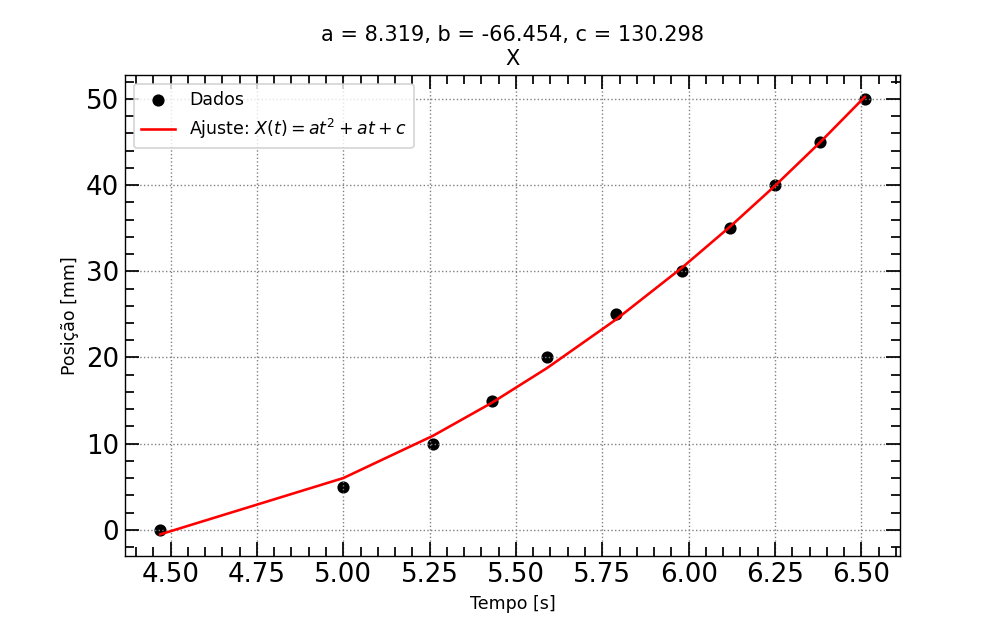

Valores ideais para os parâmetros = [  8.3189627  -66.45369139 130.29761419]

Estimativa da covariância =
 [[   0.35032906   -3.88507918   10.63567951]
 [  -3.88507918   43.22029618 -118.72115243]
 [  10.63567951 -118.72115243  327.35376769]]

[ 0.59188602  6.57421449 18.09292037]


In [197]:
popt_DDP, pcov_DDP = curve_fit(func, Exp3_DDP['T'], Exp3_DDP['X'])
perr_DDP = np.sqrt(np.diag(pcov_DDP))

plt.figure(figsize = (8,5))

plt.scatter(Exp3_DDP['T'], Exp3_DDP['X'], color = 'black', label = 'Dados')
plt.plot(Exp3_DDP['T'], func(Exp3_DDP['T'], *popt_DDP), 'r-',
         label = r'Ajuste: $X(t)=at^2+at+c$')
plt.title('a = %5.3f, b = %5.3f, c = %5.3f' % tuple(popt_DDP) + str('\nX'))
plt.xlabel('Tempo [s]')
plt.ylabel('Posição [mm]')
plt.legend(loc = 'best')
opt_plot()
plt.savefig('Fit_DDP.png', dpi = 400)

print('Valores ideais para os parâmetros =', popt_DDP)
print('')
print('Estimativa da covariância =\n', pcov_DDP)
print('')
print(perr_DDP)

In [200]:
a_CM = 2*popt_DDP[0]
print('a_CM =', a_CM, 'mm/s^2')

a_CM = 16.63792540749124 mm/s^2


---

### Parte 4

<IPython.core.display.Javascript object>


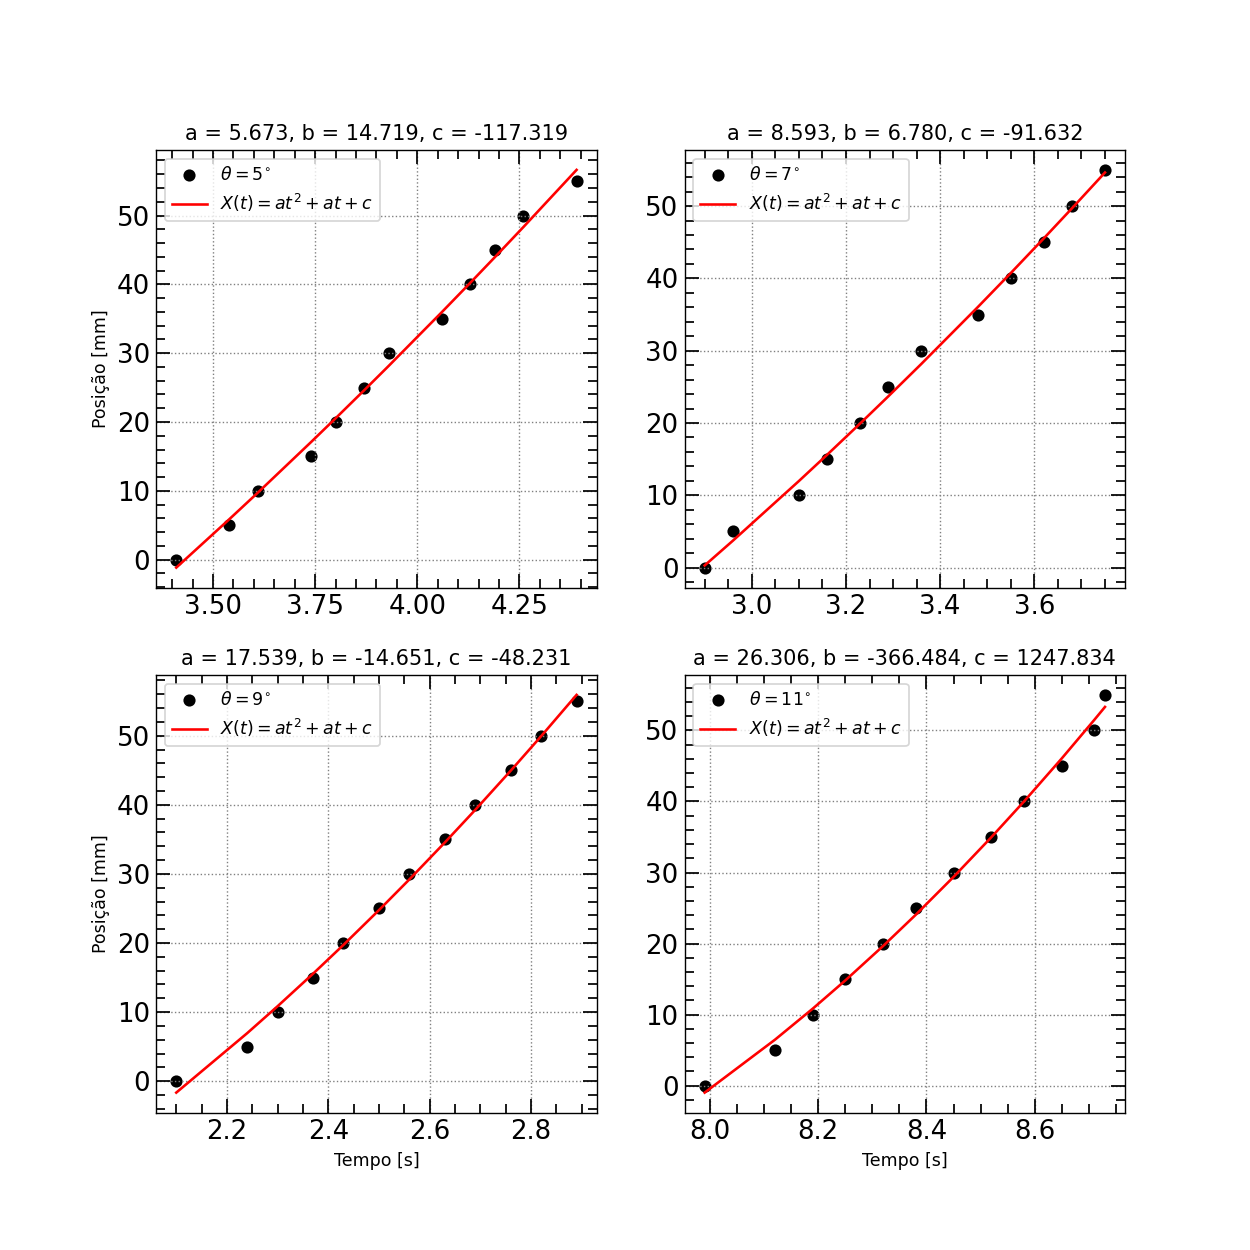

In [184]:
popt_5, pcov_5 = curve_fit(func, Exp3_5['T'], Exp3_5['X'])
popt_7, pcov_7 = curve_fit(func, Exp3_7['T'], Exp3_7['X'])
popt_9, pcov_9 = curve_fit(func, Exp3_9['T'], Exp3_9['X'])
popt_11, pcov_11 = curve_fit(func, Exp3_11['T'], Exp3_11['X'])

fig = plt.figure(figsize = (10,10))

fig.add_subplot(221)
plt.scatter(Exp3_5['T'], Exp3_5['X'], color = 'black', label = r'$\theta=5^{\circ}$')
plt.plot(Exp3_5['T'], func(Exp3_5['T'], *popt_5), 'r-',
         label = r'$X(t)=at^2+at+c$')
plt.title('a = %5.3f, b = %5.3f, c = %5.3f' % tuple(popt_5))
plt.ylabel('Posição [mm]')
plt.legend(loc = 'best')
opt_plot()

fig.add_subplot(222)
plt.scatter(Exp3_7['T'], Exp3_7['X'], color = 'black', label = r'$\theta=7^{\circ}$')
plt.plot(Exp3_7['T'], func(Exp3_7['T'], *popt_7), 'r-',
         label = r'$X(t)=at^2+at+c$')
plt.title('a = %5.3f, b = %5.3f, c = %5.3f' % tuple(popt_7))
plt.legend(loc = 'best')
opt_plot()

fig.add_subplot(223)
plt.scatter(Exp3_9['T'], Exp3_9['X'], color = 'black', label = r'$\theta=9^{\circ}$')
plt.plot(Exp3_9['T'], func(Exp3_9['T'], *popt_9), 'r-',
         label = r'$X(t)=at^2+at+c$')
plt.title('a = %5.3f, b = %5.3f, c = %5.3f' % tuple(popt_9))
plt.xlabel('Tempo [s]')
plt.ylabel('Posição [mm]')
plt.legend(loc = 'best')
opt_plot()

fig.add_subplot(224)
plt.scatter(Exp3_11['T'], Exp3_11['X'], color = 'black', label = r'$\theta=11^{\circ}$')
plt.plot(Exp3_11['T'], func(Exp3_11['T'], *popt_11), 'r-',
         label = r'$X(t)=at^2+at+c$')
plt.title('a = %5.3f, b = %5.3f, c = %5.3f' % tuple(popt_11))
plt.xlabel('Tempo [s]')
plt.legend(loc = 'best')
opt_plot()

plt.savefig('Fit_theta.png', dpi = 400)

In [187]:
print('##### theta = 5 graus #####')

print('Valores ideais para os parâmetros =', popt_5)
print('Estimativa da covariância =\n', pcov_5)



print('\n##### theta = 7 graus #####')

print('Valores ideais para os parâmetros =', popt_7)
print('Estimativa da covariância =\n', pcov_7)



print('\n##### theta = 9 graus #####')

print('Valores ideais para os parâmetros =', popt_9)
print('Estimativa da covariância =\n', pcov_9)



print('\n##### theta = 11 graus #####')

print('Valores ideais para os parâmetros =', popt_11)
print('Estimativa da covariância =\n', pcov_11)

##### theta = 5 graus #####
Valores ideais para os parâmetros = [   5.67346929   14.71870619 -117.31918257]
Estimativa da covariância =
 [[   24.84508246  -193.79356232   375.78213864]
 [ -193.79356232  1513.5481443  -2938.72997825]
 [  375.78213864 -2938.72997825  5713.59779326]]

##### theta = 7 graus #####
Valores ideais para os parâmetros = [  8.59342774   6.77993363 -91.631985  ]
Estimativa da covariância =
 [[   29.41438769  -195.84558035   323.85949245]
 [ -195.84558035  1305.65083026 -2161.91959076]
 [  323.85949245 -2161.91959076  3584.63870376]]

##### theta = 9 graus #####
Valores ideais para os parâmetros = [ 17.53872233 -14.65108624 -48.23096171]
Estimativa da covariância =
 [[   31.95991719  -160.31558236   199.27257652]
 [ -160.31558236   805.83420915 -1003.79043146]
 [  199.27257652 -1003.79043146  1253.19937451]]

##### theta = 11 graus #####
Valores ideais para os parâmetros = [  26.30622213 -366.48370017 1247.83432772]
Estimativa da covariância =
 [[ 4.40550498e+01 -

In [199]:
a_CM_5 = 2*popt_5[0]
print('a_CM (theta = 5 graus) =', a_CM_5, 'mm/s^2')

a_CM_7 = 2*popt_7[0]
print('\na_CM (theta = 7 graus) =', a_CM_7, 'mm/s^2')

a_CM_9 = 2*popt_9[0]
print('\na_CM (theta = 9 graus) =', a_CM_9, 'mm/s^2')

a_CM_11 = 2*popt_11[0]
print('\na_CM (theta = 11 graus) =', a_CM_11, 'mm/s^2')

a_CM (theta = 5 graus) = 11.346938589734439 mm/s^2

a_CM (theta = 7 graus) = 17.1868554836406 mm/s^2

a_CM (theta = 9 graus) = 35.077444668395266 mm/s^2

a_CM (theta = 11 graus) = 52.612444251975525 mm/s^2


### Parte 5

In [198]:
Exp3_aCM = pd.read_csv('Exp3 - sin(theta) X a_CM.csv')
Exp3_aCM

,sin_theta,a_CM
0,0.087,11.34
1,0.122,17.18
2,0.156,35.00
3,0.191,58.60


In [222]:
x_data = Exp3_aCM['sin_theta']
y_data = Exp3_aCM['a_CM']

deg = 1
p = np.polyfit(x_data, y_data, deg)
m = p[0]  
c = p[1]  
print(f'A reta ajustada tem equação y = {m:.1f}x {c:=+6.1f}')



n = y_data.size
m = p.size

dof = n - m
alpha = 0.05
tails = 2
t_critical = stats.t.ppf(1 - (alpha / tails), dof)
print('t crítico =', t_critical)



y_model = np.polyval(p, x_data)
model = np.poly1d(p)
y_model = model(x_data)

y_bar = np.mean(y_data)
R2 = np.sum((y_model - y_bar)**2) / np.sum((y_data - y_bar)**2)

print(f'R² = {R2:.2f}')



resid = y_data - y_model
chi2 = sum((resid / y_model)**2)
chi2_red = chi2 / dof
std_err = np.sqrt(sum(resid**2) / dof)
print('Desvio padrão =', std_err)

A reta ajustada tem equação y = 461.2x - 33.6
t crítico = 4.302652729911275
R² = 0.94
Desvio padrão = 6.379296451870586


<IPython.core.display.Javascript object>


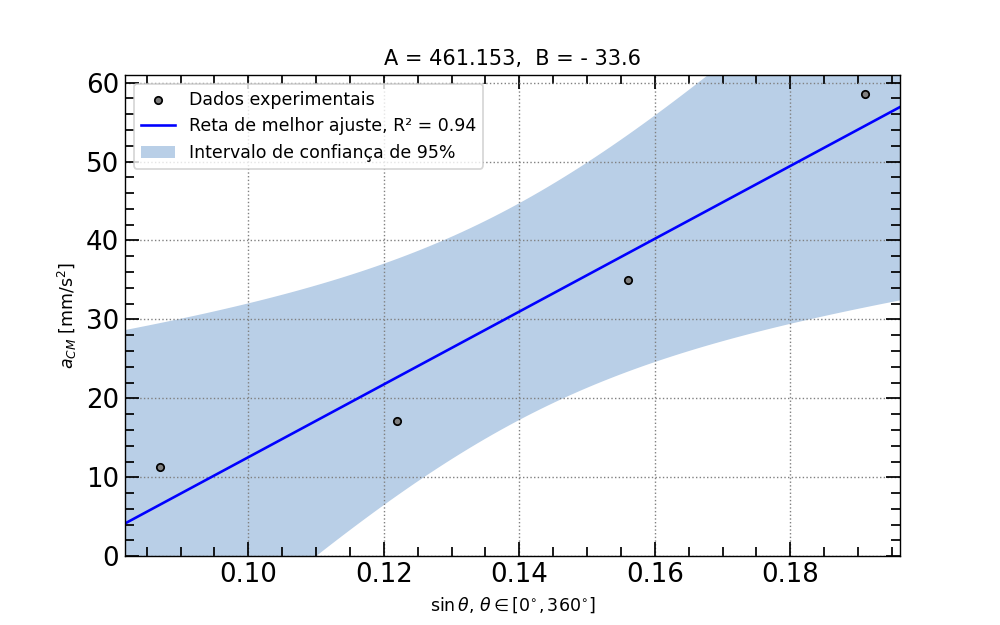

Coeficiente angular =  461.152689609088
Coeficiente linear =  -33.57022385566325


In [277]:
plt.figure(figsize = (8,5))
plt.scatter(x_data, y_data, c = 'gray', marker = 'o', edgecolors = 'k', s = 18, label = 'Dados experimentais')
xlim = plt.xlim()
ylim = plt.ylim()

plt.plot(np.array(xlim), p[1] + p[0] * np.array(xlim), color = 'blue', label = f'Reta de melhor ajuste, R² = {R2:.2f}')

x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = np.polyval(p, x_fitted)

ci = t_critical * std_err * np.sqrt(1 / n + (x_fitted - np.mean(x_data))**2 / np.sum((x_data - np.mean(x_data))**2))
plt.fill_between(
    x_fitted, y_fitted + ci, y_fitted - ci, facecolor = '#b9cfe7', zorder = 0,
    label = r'Intervalo de confiança de 95%')

pi = t_critical * std_err * np.sqrt(1 + 1 / n + (x_fitted - np.mean(x_data))**2 / np.sum((x_data - np.mean(x_data))**2))
#plt.plot(x_fitted, y_fitted - pi, '--', color = '0.5', label = r'Limites de previsão de 95%')
#plt.plot(x_fitted, y_fitted + pi, '--', color = '0.5')

plt.title('A = {:.3f}'.format(p[0]) + ',  B = {:=+6.1f}'.format(p[1]))
#plt.title("y = {:8.3f}x".format(p[0]) + ' {:8.3f}'.format(p[1]))
plt.xlabel(r'$\sin{\theta}$, $\theta\in[0^{\circ},360^{\circ}]$')
plt.ylabel(r'$a_{CM}$ [mm/s$^{2}$]')

plt.legend(loc = 'upper left')
plt.xlim(xlim)
plt.ylim(0, ylim[1])
opt_plot()
plt.savefig('Fit_aCM.png', dpi = 400)

print('Coeficiente angular = ', p[0])
print('Coeficiente linear = ', p[1])

### Parte 6

In [281]:
M = 7*1e-4 # [kg]
g = 9.81 # [m/s^2]
r = 1.08*1e-3 # [m]
R = 11.6*1e-3 # [m]

param = (M*g* r**2)/p[0]
print(param)

param_f = param/(r**2)
print(param_f)

F_P = a_CM*1e-3 * param_f * (r/(R+r))
print('Fp =', F_P, 'N')

1.7368799923491008e-11
1.4890946436463485e-05
Fp = 2.110211455373606e-08 N


---

### Parte 8

In [285]:
Fel = 1.1375*1e-16 # [N]
Fp = 2.11021*1e-8 # [N]

Fel/Fp

5.390458769506353e-09

---

## Atividade 4

### Parte 2

In [72]:
d = 440e-3 # [m]
k = 1e-3/570 # [m]
c = const.c # [m/s]
h = const.Planck

Exp4 = pd.read_csv('Exp4.csv')

# Converter para m
Exp4['2L'] = Exp4['2L'] * 1e-3
Exp4['L'] = Exp4['L'] * 1e-3

# Calculando sin(theta)
Exp4['sin(theta)'] = Exp4['L']/(np.sqrt(d**2 + (Exp4['L'])**2))

# Calculando lambda
Exp4['lambda (m)'] = k*Exp4['sin(theta)']

# Calculando a frequênca
Exp4['Freq (1/s)'] = c/Exp4['lambda (m)']

# Calculando a energia
Exp4['Energia (eV)'] = h*Exp4['Freq (1/s)']*6.242e+18

# Transições
Trans = 'Balmer'
Exp4['Transição'] = Trans
Exp4

,Cor,2L,L,sin(theta),lambda (m),Freq (1/s),Energia (eV),Transição
0,Roxo,0.210,0.1050,0.232119,4.072256e-07,7.361827e+14,3.044846,Balmer
1,Azul,0.219,0.1095,0.241498,4.236800e-07,7.075916e+14,2.926594,Balmer
2,Ciano,0.252,0.1260,0.275298,4.829793e-07,6.207149e+14,2.567272,Balmer
3,Verde,0.282,0.1410,0.305168,5.353831e-07,5.599588e+14,2.315986,Balmer
4,Amarelo,0.304,0.1520,0.326520,5.728425e-07,5.233418e+14,2.164538,Balmer


### Parte 3

In [43]:
Exp5_ = pd.read_csv('Exp5-.csv')

lambdaf = 440
lambdai = 380
lambda_ = (lambdaf - lambdai)/2 + lambdai
lambda_

410.0

### Parte 4

In [54]:
d = 1.732 # [m]
theta = np.deg2rad(30)

L = np.sqrt(d**2 * ((1/(np.cos(theta))**2) - 1))

lambda__ = 7*1e-7 # [m]
k = lambda__/np.sin(theta)
N = 1e-3/k
N

714.2857142857142

### Parte 5

In [55]:
lam = 6.5*1e-7
m = 2
k = m*lam
k

1.2999999999999998e-06

---

## Atividade 5

#### Parte 1

In [2]:
Exp5 = pd.read_csv('Exp5.csv')
Exp5

,I,V_1,V_2
0,0.50,3443,96
1,0.74,3443,147
2,0.86,3443,169
3,1.10,3443,214


In [38]:
def B(I, n, R):
    mu_0 = const.mu_0
    norm = (4/5)**(3/2)
    ratio = I/R
    B = norm * mu_0 * n * ratio
    
    return B


n = 154 
R = 0.2 # [m]
I = Exp5['I'] # [A]
Exp5['B'] = B(I, n, R) # [T]



def Fel(V, h):
    E = V/h
    e = const.elementary_charge
    Fel = e*E
    
    return Fel

V = Exp5['V_2'] # [Volts]
h = 8*1e-3 # [m]
Exp5['Fel'] = Fel(V, h) # [N]



def Fmag(B, E):
    v = E/B 
    e = const.elementary_charge
    Fmag = e*v*B
    
    return Fmag

E = V/h
Exp5['Fmag'] = Fmag(Exp5['B'], E) # [N]



def charge_mass_ratio(V_1, V_2, B, h):
    e_m = V_2**2/(2*h**2 * B**2 * V_1)
    
    return e_m

V_1 = Exp5['V_1']
V_2 = Exp5['V_2']
B = Exp5['B']

Exp5['e/m'] = charge_mass_ratio(V_1, V_2, B, h) # [C/kg]
Exp5

,I,V_1,V_2,B,Fel,Fmag,e/m
0,0.50,3443,96,0.000346,1.922612e-15,1.922612e-15,1.744955e+11
1,0.74,3443,147,0.000512,2.944000e-15,2.944000e-15,1.867898e+11
2,0.86,3443,169,0.000595,3.384598e-15,3.384598e-15,1.827925e+11
3,1.10,3443,214,0.000762,4.285822e-15,4.285822e-15,1.791530e+11


---